In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
cv2.__version__

'3.4.2'

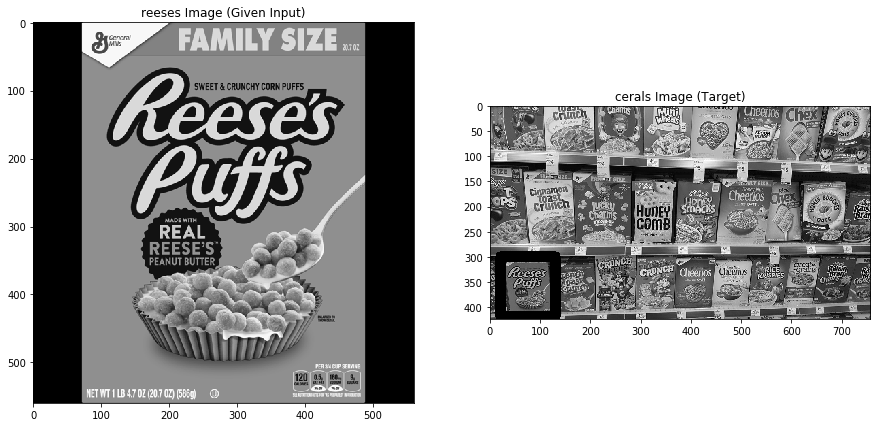

In [3]:
cerals = cv2.imread('many_cereals.jpg' , 0 )
reeses = cv2.imread( 'reeses_puffs.png' , 0 )

cv2.rectangle( cerals , pt1 = (20,300) , pt2 = (130,420) , color = (0,0,255) , thickness = 20 )

plt.figure(figsize = (15 , 8 ))


plt.subplot( 1 , 2 , 1 )
plt.title('reeses Image (Given Input)' )
plt.imshow( reeses , cmap = 'gray' )

plt.subplot( 1 , 2 , 2 )
plt.title('cerals Image (Target)' )
plt.imshow( cerals , cmap = 'gray' )

plt.show()

# Brute Forese detection using ORB descriptor 

In [4]:
orb = cv2.ORB_create()

kp1 , des1 = orb.detectAndCompute( reeses , None )
kp2 , des2 = orb.detectAndCompute( cerals , None )

bf = cv2.BFMatcher( cv2.NORM_HAMMING , crossCheck = True )

matches = bf.match( des1 , des2 )

matches = sorted(  matches , key = lambda x : x.distance )

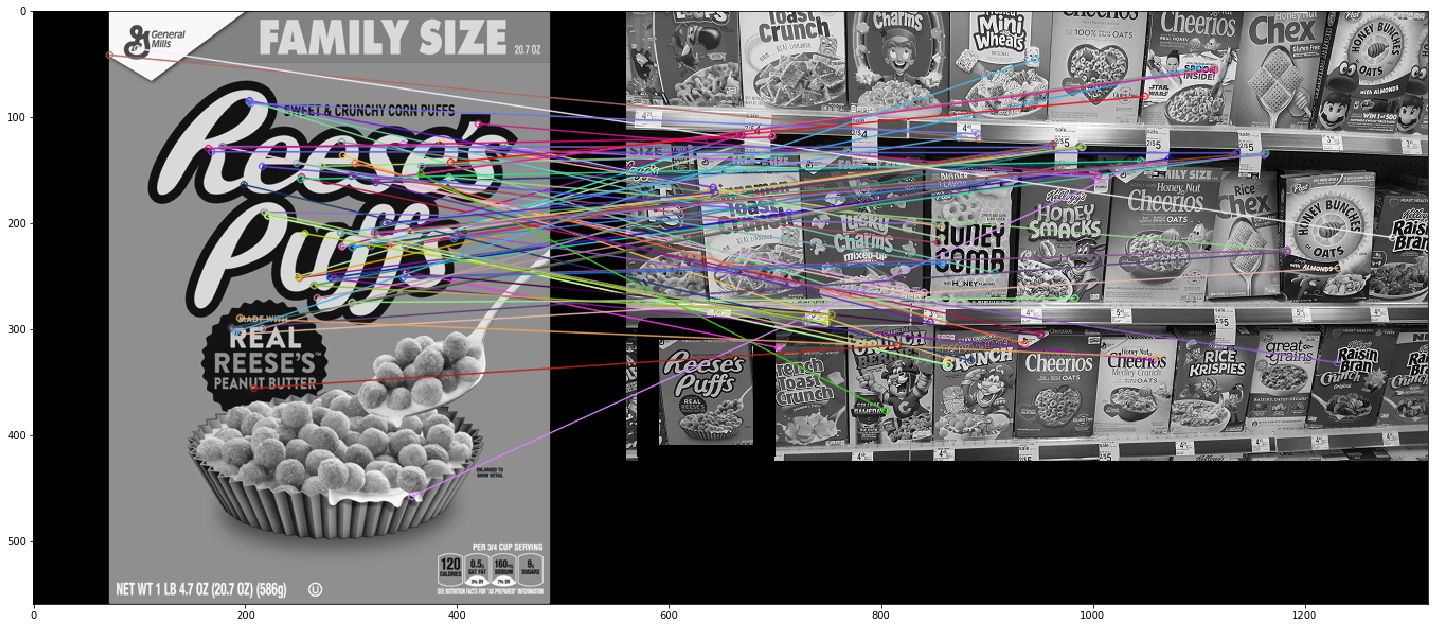

In [5]:
reeses_match = cv2.drawMatches( reeses , kp1 , cerals , kp2 , matches[:80] , None , flags =2 )

plt.figure(figsize = (25 , 40 ))
plt.imshow( reeses_match )

- The above method is unable to detect the target because our images are of different scale
- Use SIFT method to tackle this problem ( scale invariate feature transformer )

# Brute Forese detection using SIFT descriptor

- error: OpenCV(4.2.0) C:\projects\opencv-python\opencv_contrib\modules\xfeatures2d\src\sift.cpp:1210: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SIFT::create'
- Solution : 
- pip install opencv-contrib-python==3.4.2.17 

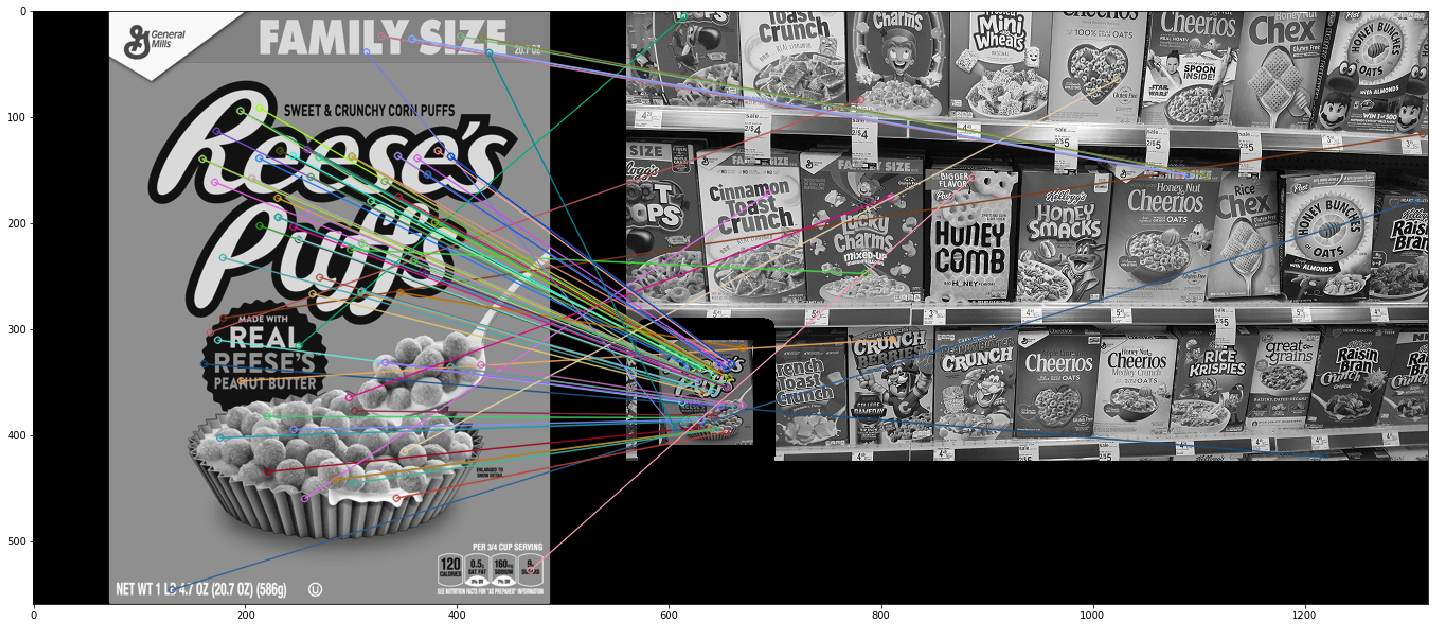

In [20]:
sift = cv2.xfeatures2d.SIFT_create()

kp1 , des1 = sift.detectAndCompute( reeses , None )
kp2 , des2 = sift.detectAndCompute( cerals , None )

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        
# cv.drawMatchesKnn expects list of lists as matches.
reeses_match = cv2.drawMatchesKnn(reeses,kp1,cerals,kp2,good,None,flags=2)

plt.figure(figsize = (25 , 40 ))
plt.imshow( reeses_match )

# FLANN based Matcher

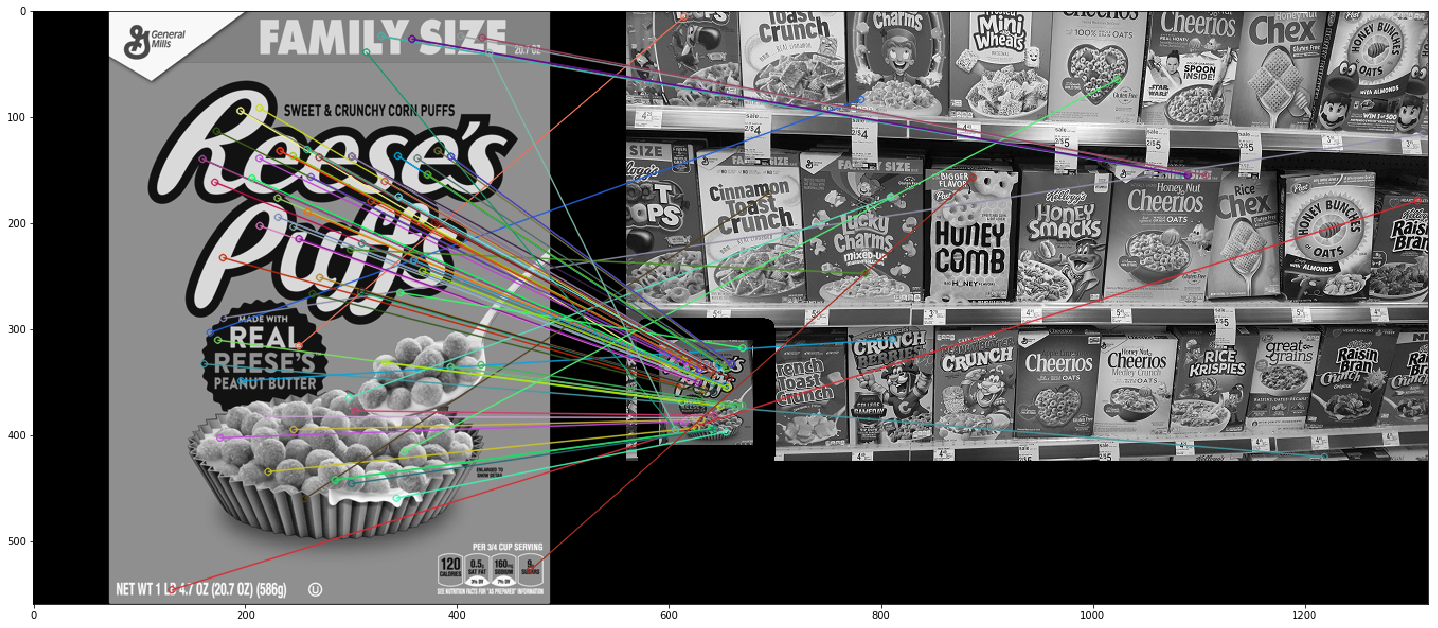

In [21]:
sift = cv2.xfeatures2d.SIFT_create()

kp1 , des1 = sift.detectAndCompute( reeses , None )
kp2 , des2 = sift.detectAndCompute( cerals , None )

# FLANN Params
FLANN_INDEX_KDTREE = 0 
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) 


flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        
# cv.drawMatchesKnn expects list of lists as matches.
reeses_match = cv2.drawMatchesKnn(reeses,kp1,cerals,kp2,good,None,flags=2)

plt.figure(figsize = (25 , 40 ))
plt.imshow( reeses_match )

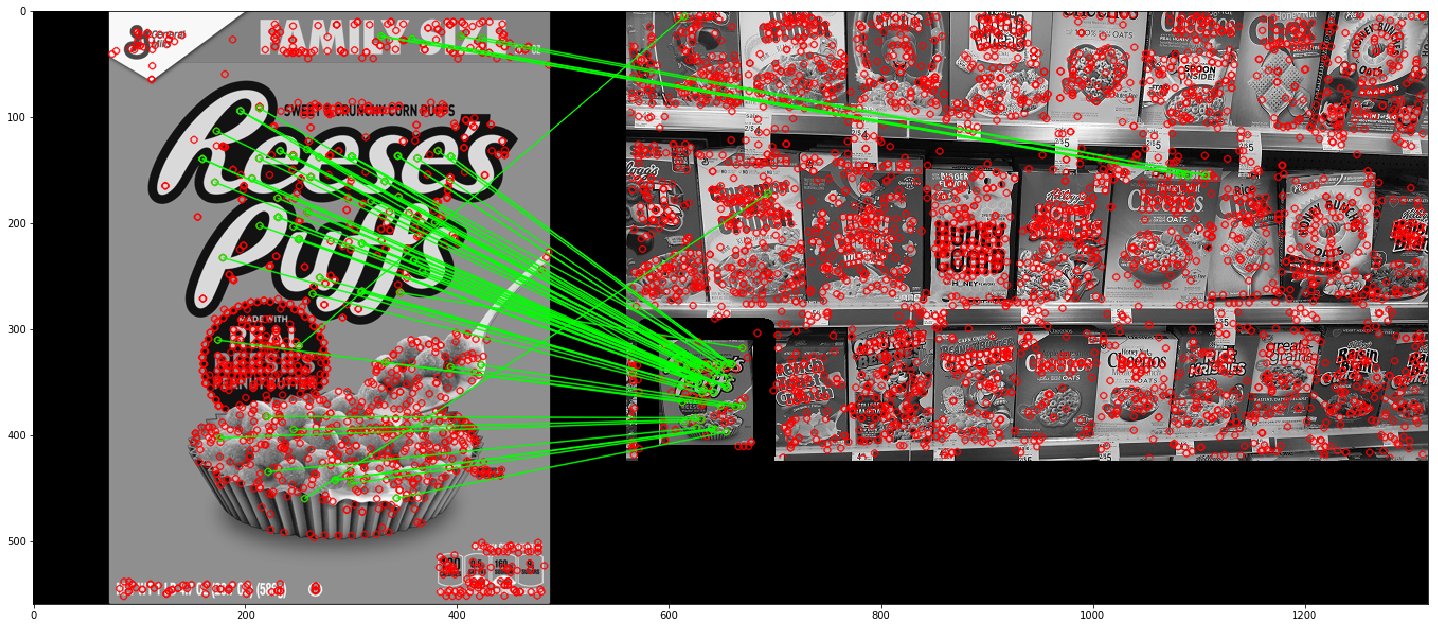

In [22]:
sift = cv2.xfeatures2d.SIFT_create()

kp1 , des1 = sift.detectAndCompute( reeses , None )
kp2 , des2 = sift.detectAndCompute( cerals , None )

# FLANN Params
FLANN_INDEX_KDTREE = 0 
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) 


flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
        
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)

reeses_match = cv2.drawMatchesKnn(reeses,kp1,cerals,kp2,matches,None,**draw_params)

plt.figure(figsize = (25 , 40 ))
plt.imshow( reeses_match )